<a href="https://colab.research.google.com/github/leesolhahaha/data-analysis-ta/blob/main/4_Null%EA%B0%92_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 유효 데이터 개수 확인
- DataFrame 각 열의 유효 데이터 개수 확인: DataFrame객체.**`count()`**
- DataFrame의 특정 열의 유효 데이터 개수 확인: DataFrame**`['열이름'].count()`**

[교수님 드라이브](https://drive.google.com/drive/folders/1CqMUiblh9dTKCn8QrdNWY_hKIcMsbi3B)

In [ ]:
# 판다스, 넘파이 라이브러리 임포트

import pandas as pd
import numpy as np

In [ ]:
# 첫번째 컬럼 -> 이름:'a', 데이터: [1, 1, 3, 2]
# 두번째 컬럼 -> 이름:'b', 데이터: [np.nan, 2, 3, 2]인 데이터프레임 객체 exam을 생성

exam = pd.DataFrame({'a':[1, 1, 3, 2],
              'b':[np.nan, 2, 3, 2]})

In [ ]:
# exam확인

exam

,a,b
0,1,NaN
1,1,2.0
2,3,3.0
3,2,2.0


In [ ]:
# 데이터프레임 exam의 각 컬럼의 유효 데이터 개수를 확인한다.

exam.count()

a    4
b    3
dtype: int64

In [ ]:
# 'a'열의 유효 데이터 개수 확인

exam['a'].count()

4

In [ ]:
exam

,a,b
0,1,NaN
1,1,2.0
2,3,3.0
3,2,2.0


## 1.1 데이터프레임 각열의 고유데이터 확인1
- 각 열의 고유 데이터 확인: DataFrame객체**`['열이름'].unique()`**
- 각 열의 고유 데이터 개수 확인: DataFrame객체**`['열이름'].nunique()`**


In [ ]:
# 데이터프레임 exam의  'a' 컬럼의 고유 데이터를 확인한다.

exam['a'].unique()

array([1, 3, 2])

In [ ]:
# 데이터프레임 exam의  'b' 컬럼의 고유 데이터를 확인한다.

exam['b'].unique()

array([nan,  2.,  3.])

In [ ]:
# 데이터프레임 exam의  'a' 컬럼의 고유 데이터 개수를 확인한다.

exam['a'].nunique()

3

In [ ]:
# 데이터프레임 exam의  'b' 컬럼의 고유 데이터 개수를 확인한다.

exam['b'].nunique()

2

## 1.2 데이터프레임 각열의 고유데이터 확인2
- 각 열의 고유데이터 종류와 개수 확인 : DataFrame객체**`['열이름'].value_counts()`**
  * 각 열의 고유값의 종류와 객수를 확인
  * 고유값이 행 인덱스가 되고, 고유값의 개수가 데이터 값이 되는 시리즈 객체가 만들어짐
  * dropn=True 옵션을 설정하며 데이터 값 중에수 NaN을 제외하고 개수를 계산함  
  * dropna 옵션을 설정하지 않으면 dropna=True 옵션이 기본적으로 적용됨(이때 NaN이 카운트됨)

In [ ]:
# exam확인

exam

,a,b
0,1,NaN
1,1,2.0
2,3,3.0
3,2,2.0


In [ ]:
# exam의 'a'열의 고유데이터종류와 개수 확인

exam['a'].value_counts()

1    2
3    1
2    1
Name: a, dtype: int64

In [ ]:
# exam의 'b'열의 고유데이터종류와 개수 확인

exam['b'].value_counts()

2.0    2
3.0    1
Name: b, dtype: int64

In [ ]:
# exam의 'b'열의 고유데이터종류와 개수 확인
# dropna=False

exam['b'].value_counts(dropna=False)

2.0    2
NaN    1
3.0    1
Name: b, dtype: int64

# 2 데이터 전처리(Data Preprocessing)
- 머신러닝 등 데이터 분석의 정확도는 분석 데이터의 품질에 의해 좌우된다.
- **`데이터 품질을 높이기 위해서는 누락 데이터, 중복 데이터 등 오류를 수정하고 분석 목적에 맞게 변형하는 과정이 필요`**하다.
- **`수집한 데이터를 분석에 적합하도록 처리하는 과정을 데이터 전처리(Data Preprocessing)`**이라고 한다.

* <b>누락 데이터 처리</b>
    - 데이터 프레임에는 원소 데이터 값이 종종 누락되는 경우가 있다.
    - 데이터를 파일로 입력할 때 빠뜨리거나 파일 형식을 변환하는 과정에서 데이터가 손실되는 것이 주요 원인이다.
    - 일반적으로 <b><u>유효한 데이터 값이 존재하지 않는 누락 데이터를  Nan(Not a Number)로 표시</u></b>한다.
    
    - <b><u>데이터 분석을 하기 전에 반드시 누락 데이터를 제거하거나 다른 적적할 값으로 대체하는 과정이 필요</u></b>하다.

## 2.1 누락 데이터 확인
* 누락 데이터를 처리하기 전에 데이터 중에 누락 데이터가 있는 지 확인해야 한다.

* Seaborn 라이러리의 'titanic' 데이터셋을 사용한다.

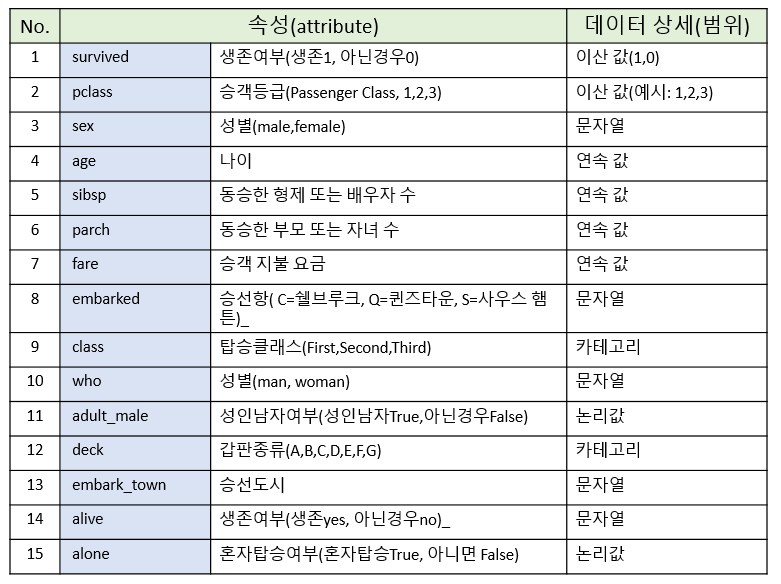

### 2.1.1 누락 데이터 확인하기 - 계산하여 확인

In [ ]:
# 판다스, Seaborn 라이브러리 임포트

import pandas as pd
import seaborn as sns

In [ ]:
# Seaborn 라이브러리의 'titanic'데이터셋을 로드(seaborn.load_dataset())한다.
# 로드한 데이터프레임을  df에 대입한다.

df = sns.load_dataset('titanic')

In [ ]:
# 데이터프레임 df의 앞부분 데이터 확인

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 데이터프레임 df의 뒷부분 데이터 확인

df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
625,0,1,male,61.0,0,0,32.3208,S,First,man,True,D,Southampton,no,True
593,0,3,female,NaN,0,2,7.7500,Q,Third,woman,False,NaN,Queenstown,no,False
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False


In [ ]:
# 데이터프레임 df의 행,렬에 대해 확인

df.shape

(891, 15)

In [ ]:
# 데이터프레임 df의 컬럼 확인

df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# 데이터프레임 df의 모든 컬럼의 데이터 타입 확인

df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
# 데이터프레임 df의 요약정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# 데이터프레임 각 열의 유효 데이터 개수를 확인한다.

df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

* 누락 데이터 개수 계산해보기 : 총행수(df.shape[0]) - 유효데이터수(df.count())    

In [ ]:
df.shape[0]

891

In [ ]:
# 누락 데이터 개수 게산해보기
# 총행수 - 유효데이터수
# df.shape[0] - df.count()

df.shape[0] - df.count()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 2.1.2 누락데이터 확인하기 - 판다스 메소드 이용하여 확인
* DataFrame객체.**`isnull()(isna())`** : 누락데이터이면 True를 반환하고, 유효한 데이터가 존해하면 False를 반환한다.
* DataFrame객체.**`notnull()`** : 유효한 데이터이면 True를 반환하고, 누락 데이터이면 False를 반환한다.

In [ ]:
# 데이터프레임 df의 isnull() 메소드로 누락 데이터 찾기

df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 데이터프레임 df의 notull() 메소드로 유효 데이터 찾기

df.notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


### 2.1.3 누락데이터 개수 구하기
* sum()
* isnull() 메소드와 notnull() 메소드를 활용하여 누락데이터 개수를 구할 수 있다.
* isnull() 메소드의 경우 반환되는 값이 참이면 1이고, 거짓이면 0으로 판별한다.
* 따라서 **`isnull() 메소드를 실행하고 sum(0) 메소드를 적용하면 참(1)의 합을 구할 수 있다`**.

In [ ]:
# True는 1과 같다

True == 1

True

In [ ]:
# False는 0과 같다.

False == 0

True

In [ ]:
# True + True + False ???

True + True + False

2

In [ ]:
# 첫번째 컬럼=> 이름: 'a', 데이터: 1, 2, 3
# 두번째 컬럼=> 이름: 'b', 데이터: 11, 22, 33
# 세번째 컬럼=> 이름: 'c', 데이터: 111, 222, 333 인 데이터프레임 df_sum 을 생성하고 확인한다.

df_sum = pd.DataFrame({'a':[1, 2, 3],
              'b':[11,22,33],
              'c':[111,222,333]})

In [ ]:
# df_sum확인

df_sum

,a,b,c
0,1,11,111
1,2,22,222
2,3,33,333


In [ ]:
# df_sum의 각열의 데이터를 합함

df_sum.sum()

a      6
b     66
c    666
dtype: int64

* titanic 데이터셋의 데이터프레임  df에 적용해본다.

In [ ]:
# 데이터프레임 df의 isnull()메소드와  sum()메소들 이용하여 누락 데이터 개수 구하기

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# 데이터프레임 df의 유효 데이터 개수 구하기

# df.count()
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

## 2.2 누락 데이터 제거
* <b>`데이터프레임객체.dropna()`</b>
- 누락데이터가 들어있는 열을 삭제하면 분석 대상이 갖는 특성(변수)를 제거하고, 행을 삭제하면 분석 대상의 관측값(레코드)를 제거하게 된다.


In [ ]:
import numpy as np
df_exam01 = pd.DataFrame({'name':['Alfred', 'Batman', 'Catwoman'],
                         'toy':[np.nan, 'Batmobile', 'Bullwhip'],
                         'city':[np.nan, 'LA', np.nan]})

In [ ]:
# df_exam01확인

df_exam01

,name,toy,city
0,Alfred,NaN,NaN
1,Batman,Batmobile,LA
2,Catwoman,Bullwhip,NaN


In [ ]:
# 적어도 하나의 누락데이터가 있는 행을 삭제
# 디폴트로 axis=0

df_exam01.dropna(axis=0)

,name,toy,city
1,Batman,Batmobile,LA


In [ ]:
# df_exam01은 변경되지 않았음을 확인

df_exam01

,name,toy,city
0,Alfred,NaN,NaN
1,Batman,Batmobile,LA
2,Catwoman,Bullwhip,NaN


In [ ]:
#적어도 하나의 누락데이터가 있는 열을 삭제

df_exam01.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [ ]:
# df_exam01은 변경되지 않았음을 확인

df_exam01

,name,toy,city
0,Alfred,NaN,NaN
1,Batman,Batmobile,LA
2,Catwoman,Bullwhip,NaN


In [ ]:
#유효데이터가 2개 이상인 행만 남김, 즉, 유효데이터가 2개 미만인 행을 삭제

df_exam01.dropna(thresh=2)

,name,toy,city
1,Batman,Batmobile,LA
2,Catwoman,Bullwhip,NaN


In [ ]:
# 'name'과 'toy'열의 데이터중에서 누락데이터가 있으면 행 삭제

df_exam01.dropna(subset=['name','toy'])

,name,toy,city
1,Batman,Batmobile,LA
2,Catwoman,Bullwhip,NaN


In [ ]:
# df_exam01 데이터프레임 자체가 변경됨

df_exam01.dropna(inplace=True)

In [ ]:
# df_exam01확인

df_exam01

,name,toy,city
1,Batman,Batmobile,LA


## 2.3 누락 데이터 치환
<b>`데이터프레임객체(시리즈객체).fillna()`</b>
- 데이터셋의 품질을 높일 목적으로 누락 데이터를 무작정 삭제해 버린다면 어렵게 수집한 데이터를 활용하지 못하게 된다.
- 데이터 분석의 정확도는 데이터의 품질 이외에도 제공되는 데이터의 양에 의해 상당한 영향을 받느다.
- 따라서 데이터 중에서 일부가 누락되어 있더라도 나머지 데이터를 최대한 살려서 데이터 분석에 활요하는 것이 좋은 결과를 얻는 경우가 많다.
- 누락 데이터를 바꿔서 대체할 값으로는 데이터의 분포와 특성을 잘 나타낼 수 있는 평균값, 최빈값 등을 활용한다.

In [ ]:
import numpy as np

df_exam02 = pd.DataFrame([[np.nan, 2, np.nan, 0],
                        [3, 4, np.nan, 1],
                        [np.nan, np.nan, np.nan, 5],
                        [np.nan, 3, np.nan, 4]],
                        columns=list('ABCD'))

In [ ]:
# df_exam02확인

df_exam02

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [ ]:
# NaN을 0으로 치환

df_exam02.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [ ]:
# df_exam02 확인

df_exam02

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [ ]:
# NaN이 있는 행의 직전행에 있는 값으로 치환

df_exam02.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [ ]:
df_exam02

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [ ]:
# NaN이 있는 행의 바로 다음행에 있는 값으로 치환

df_exam02.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [ ]:
# df_exam02확인

df_exam02

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


## 2.4 데이터 전처리 예제

* Seaborn 라이러리의 'titanic' 데이터셋을 사용한다.

In [ ]:
# 판다스, Seaborn 라이브러리 임포트

import pandas as pd
import seaborn as sns

In [ ]:
# Seaborn 라이브러리의 'titanic'데이터셋을 로드(seaborn.load_dataset())한다.
# 로드한 데이터프레임을  df에 대입한다.

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 데이터프레임 df의 isnull()메소드와  sum()메소들 이용하여 누락 데이터 개수 구하기

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 'titanic'데이터셋에서 전체 891명의 승객 중에서 688명의 'deck' 데이터가 누락되어 있다. 누락데이터가 차지하는 비율이 매우 높기 때문에 'deck'열의 누락데이터를 삭제하여 분석에서 제외하는 것이 의미가 있다.

In [ ]:
# 열이름이 'deck'인 열을 삭제

df.drop('deck', axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
#유효한 데이터가 500개이상인 열만 남김, 즉 유효한 데이터가 500개미만인 열을 삭제

df.dropna(thresh=500, axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


* 우리 예제에서 전체 891명의 승객 중에서 177명은 'age'에 대한 데이터가 없다. 승객의 나이가 데이터 분석의 중요한 변수라면, 나이 데이터가 없는 승객의 레코드(행)을 제거하는 것이 좋다.

In [ ]:
#'age'열의 데이터가 누락데이터인 경우 그 해당 행을 제거

df.dropna(subset=['age'], axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


*  titanic 데이터프레임에서 승객의 나이 데이터가 누락된 행을 제거하지 않고, 대신 'age'열의 나머지 승객의 평균나이로 치환한다.

In [ ]:
# 'age'열의 평균을 구하여 mean_age 변수에 대입한다.

mean_age = df['age'].mean()

In [ ]:
# 'age'열의 NaN값을 다른 나이 데이터의 평균으로 치환하기
# 치환된 결과를 바로 반영하기

# df['age'].fillna(mean_age).isnull().sum()
# df['age'].isnull().sum()
df['age'].fillna(mean_age, inplace=True)

In [ ]:
# 누락데이터가 'age'평균값으로 치환되었음을 확인

df['age'].isnull().sum()

0

- 승선도시를 나타내는 'embark_town'열에 있는 NaN을 승객들이 가장 많이 승선한 도시의 이름으로 치환한다.

In [ ]:
# 'embark_town'열의 누락데이터 확인

df['embark_town'].isnull().sum()

2

In [ ]:
df['embark_town'].dtypes

dtype('O')

In [ ]:
# describe() 메소드를 이용하여 'embark_town'열의 가장 많이 승선한 도시 이름 찾기

df['embark_town'].describe(include='object')

count             889
unique              3
top       Southampton
freq              644
Name: embark_town, dtype: object

In [ ]:
# 'embark_town'열의 누락데이터를 가장 많이 승선한 도시 이름으로 치환하기

df['embark_town'].fillna('Southampton')

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [ ]:
# 'embark_town'열의 누락데이터를 가장 많이 승선한 도시 이름으로 치환되었음을 확인하기

df['embark_town'].fillna('Southampton').isnull().sum()

0

- 데이터셋의 특성상 서로 이웃하고 있는 데이터끼리 유사성을 가질 가능성이 높다.
- 이럴때 앞이나 뒤에서 이웃하고 있는 값으로 치환해 주는 것이 좋다.

In [ ]:
# 'embark_town'열의 825행에서부터 830행까지의 내용을 확인

df['embark_town'][825:831]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object

In [ ]:
# 829행의 NaN값을 바로 앞에 위치한 828행의 'Queenstown'으로 치환하고
# 치환되었음을 확인

df['embark_town'].fillna(method='ffill')[825:831]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
Name: embark_town, dtype: object

# 3 필터링
- **`시리즈 또는 데이터프레임의 데이터 중에서 특정 조건식을 만족하는 원소만 따로 추출`**하는 개념이다.

## 3.1 불린 인덱싱

데이터프레임의 불린 인덱싱: <b>`데이터프레임객체[불린시리즈]`</b>

- 시리즈 객체에 어떤 조건식을 적용하면 각 원소에 대해 참/거짓을 판별하여 불린(참,거짓) 값으로 구성된 시리즈를 반환한다.
- 이때 참에 해당하는 데이터 값을 따로 선택할 수 있는데, 많은 데이터 중에서 어떤 조건을 만족하는 데이터만을 추출하는 필터링 기법의 한 유형이다.
- 데이터프레임의 각 열은 시리즈 객체이므로, 조건식(>, <, ==, ..)을 적용하면 각 원소가 조건을 만족하는지 여부를 참과 거짓 값으로 표시하여 불린시리즈를 만들 수 있다.
- 이 **`불린시리즈를 데이터프레임에 대입하면 조건을 만족하는 행들만 선택`**할 수 있다.

* seaborn의 'titanic'데이터셋을 이용하여 불린인덱싱 해본다.

In [ ]:
# df확인

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 데이터프레임 df를 복사하여 titanic데이터프레임을 만든다.

titanic = df.copy()

* 나이가 10대(10~19세)인 승객만 따로 선택

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
titanic['sex'].value_counts(dropna=False)

male      577
female    314
Name: sex, dtype: int64

In [ ]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
# titanic 데이터프레임의 각 행의 age가 10대인지 여부를 True, False값으로 가지는 불린시리즈 mask1 생성

mask1 = (titanic['age'] >= 10) & (titanic['age'] < 20)

In [ ]:
# mask1 확인

mask1

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [ ]:
# mask1의 타입 확인

type(mask1)
# mask1은 불린시리즈이다.

pandas.core.series.Series

In [ ]:
# titanic 데이터프레임의 행 인덱스 위치에 불린시리즈 mask1을 대입하면
# 해당조건을 만족하는(즉 True인행만) 행만 남게 된다.
# 결과른 df_teenage에 대입

df_teenage = titanic.loc[mask1]

In [ ]:
# df_teenage 확인

df_teenage

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
855,1,3,female,18.0,0,1,9.3500,S,Third,woman,False,NaN,Southampton,yes,False
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.loc[(titanic['age'] >= 10) & (titanic['age'] < 20), ['survived', 'age']]

,survived,age
9,1,14.0
14,0,14.0
22,1,15.0
27,0,19.0
38,0,18.0
...,...,...
853,1,16.0
855,1,18.0
875,1,15.0
877,0,19.0


In [ ]:
# 나이가 10대(10~19세)인 승객만 따로 선택

titanic.loc[(titanic['age'] >= 10) & (titanic['age'] < 20)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
855,1,3,female,18.0,0,1,9.3500,S,Third,woman,False,NaN,Southampton,yes,False
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


* 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# titanic 데이터프레임의 각 행의 age가 10세 미만이고 성별이 여성인지 여부를 True, False값으로 가지는 불린시리즈 mask2 생성

mask2 = (titanic['age'] < 10) & (titanic['sex'] == 'female')

In [ ]:
# mask2 확인, mssk2는 불린 시리즈임

mask2

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# titanic 데이터프레임의 행 인덱스 위치에 불린시리즈 mask2를 대입하면
# 해당조건을 만족하는(즉 True인행만) 행만 남게 된다.
# 결과를 df_female_under10에 대입

df_female_under10 = titanic.loc[mask2]

In [ ]:
# df_female_under10 확인

df_female_under10

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.00,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
147,0,3,female,9.00,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
184,1,3,female,4.00,0,2,22.0250,S,Third,child,False,NaN,Southampton,yes,False
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
233,1,3,female,5.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False


In [ ]:
# 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택

titanic.loc[(titanic['age'] < 10) & (titanic['sex'] == 'female')].shape[0]

30

* 나이가 10세 미만(0~9세)이거나 또는 60세 이상인 승객의 age, sex, alone 열만 선택

In [ ]:
# titanic 데이터프레임의 각 행의 age가 10세 미만이거나 age가 60세 이상인지 여부를 True, False값으로 가지는 불린시리즈 mask3 생성

mask3 = (titanic['age'] < 10) | (titanic['age'] >=60)

In [ ]:
# mask3 확인

mask3

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [ ]:
# titanic 데이터프레임의 행 인덱스 위치에 불린시리즈 mask3을 대입하면
# 해당조건을 만족하는(즉 True인행만) 행만 남게 된다.
# 열 인덱스에 '['age', 'sex', 'alone']' 대입해 원하는 열만을 선택했기 때문에 나이가 10세 미만이거나 60세 이상인
# 탑승객의 나이, 성별, 혼자탑승여부를 선택할 수 있다.
# 결과를 df_under10_morethan60에 대입

df_under10_morethan60 = titanic.loc[mask3, ['age', 'sex', 'alone']]

In [ ]:
# df_under10_morethan60 확인

df_under10_morethan60

,age,sex,alone
7,2.00,male,False
10,4.00,female,False
16,2.00,male,False
24,8.00,female,False
33,66.00,male,True
...,...,...,...
831,0.83,male,False
850,4.00,male,False
851,74.00,male,True
852,9.00,female,False


In [ ]:
# 나이가 10세 미만(0~9세)이거나 또는 60세 이상인 승객의 age, sex, alone 열만 선택

titanic.loc[(titanic['age'] <10) | (titanic['age'] >= 60), ['age', 'sex', 'alone']]

,age,sex,alone
7,2.00,male,False
10,4.00,female,False
16,2.00,male,False
24,8.00,female,False
33,66.00,male,True
...,...,...,...
831,0.83,male,False
850,4.00,male,False
851,74.00,male,True
852,9.00,female,False


* 혼자온 사람이 아닌 데이터만 필터링

In [ ]:
titanic['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [ ]:
# 혼자온 사람이 아닌 데이터만 필터링

titanic.loc[titanic['alone'] != True]
titanic.loc[titanic['alone'] == False]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.000000,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
879,1,1,female,56.000000,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.000000,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


In [ ]:
# 혼자온 사람이 아닌 데이터만 필터링
#~은 not의 표시

titanic.loc[~titanic['alone']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.000000,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
879,1,1,female,56.000000,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.000000,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
